In [0]:
#https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679  #annual data own

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
weather_data = pd.read_excel("/content/annual data.xlsx")

In [0]:
weather_data.head(2)

,Year,Avg Temp,Avg NDVI,Avg snow cover
0,2001,283.1725,14225.59,4099.835
1,2002,281.9175,15296.26,4405.566


In [0]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Year              17 non-null int64
Avg Temp          17 non-null float64
Avg NDVI          17 non-null float64
Avg snow cover    17 non-null float64
dtypes: float64(3), int64(1)
memory usage: 624.0 bytes


In [0]:
input_feature= weather_data.iloc[:,[1,3]].values
input_data = input_feature

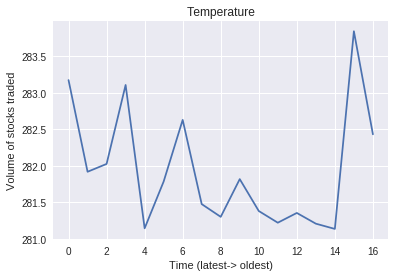

In [0]:
plt.plot(input_feature[:,0])
plt.title("Temperature")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

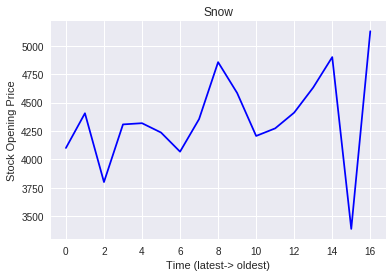

In [0]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Snow")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

In [0]:
lookback= 5
test_size=int(.3 * len(weather_data))
X=[]
y=[]
for i in range(0, len(weather_data)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i,1])

In [0]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size]

X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(12, 5, 2)
(5, 5, 2)


In [0]:
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(LSTM(units=105, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=105, return_sequences=True))
model.add(LSTM(units=105))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 105)            45360     
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 105)            88620     
_________________________________________________________________
lstm_3 (LSTM)                (None, 105)               88620     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 106       
Total params: 222,706
Trainable params: 222,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(X, y, epochs=100, batch_size=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
12/12 [==============================] - 9s 767ms/step - loss: 0.1467
Epoch 2/100
12/12 [==============================] - 1s 58ms/step - loss: 0.0298
Epoch 3/100
12/12 [==============================] - 1s 61ms/step - loss: 0.0236
Epoch 4/100
12/12 [==============================] - 1s 43ms/step - loss: 0.0213
Epoch 5/100
12/12 [==============================] - 1s 55ms/step - loss: 0.0174
Epoch 6/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0205
Epoch 7/100
12/12 [==============================] - 1s 59ms/step - loss: 0.0149
Epoch 8/100
12/12 [==============================] - 1s 59ms/step - loss: 0.0149
Epoch 9/100
12/12 [==============================] - 1s 53ms/step - loss: 0.0144
Epoch 10/100
12/12 [==============================] - 1s 56ms/step - loss: 0.0153
Epoch 11/100
12/12 [==============================] - 1s 50ms/step - loss: 0.0189
Epoch 12/100
12/12 [==============================] - 1s 5

In [0]:
predicted_value= model.predict(X_test)


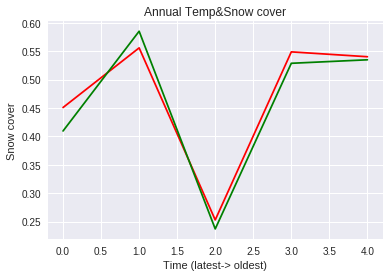

In [0]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[:5,1], color='green')
plt.title("Annual Temp&Snow cover")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Snow cover")
plt.show()

In [0]:
predicted_value

array([[0.45082042],
       [0.555798  ],
       [0.2529075 ],
       [0.5487566 ],
       [0.54022056]], dtype=float32)

In [0]:
input_data[:5,1]

array([0.40948805, 0.58508714, 0.2370623 , 0.52866564, 0.53481989])

In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.r2_score(input_data[:5,1], predicted_value, sample_weight=None, multioutput='uniform_average')

0.9584426702132438

In [0]:
rmse_test=np.sqrt(np.mean(np.power((np.array(input_data[:5,1])-np.array(predicted_value)),2)))
print(rmse_test)

0.17015814024523182


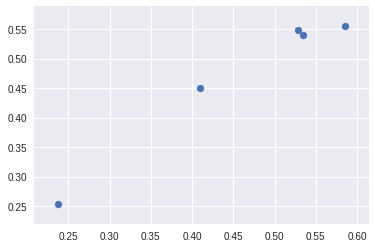

In [0]:
plt.scatter(input_data[:5,1],predicted_value)